In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import mysql.connector
import matplotlib.pyplot as plt

## Get data from database, count the difference

In [233]:
mydb = mysql.connector.connect(
    host="192.168.1.100",
    user="root",
    password="Admin1234!",
    database="web_info"
)
mycursor = mydb.cursor()
mycursor.execute(
    "select create_time, weibo_follower, chaohua_read_yi, chaohua_count, bili_channel_view_count_yi, bili_channel_feature_count, douyin_ch_user_count, douyin_ch_view_count from web_data where name_id=8")
myresult = mycursor.fetchall()

myresult = np.array(myresult)
create_time = np.array(myresult).transpose()[0, :]
# remove hour, minute, and second
create_time = [x.date() for x in create_time]
weibo_follower = np.array(myresult).transpose()[1, :]
chaohua_read_yi = np.array(myresult).transpose()[2, :]
chaohua_count = np.array(myresult).transpose()[3, :]
bili_channel_view_count_yi = np.array(myresult).transpose()[4, :]
bili_channel_feature_count = np.array(myresult).transpose()[5, :]
douyin_ch_user_count = np.array(myresult).transpose()[6, :]
douyin_ch_view_count = np.array(myresult).transpose()[7, :]

weibo_follower_diff = np.concatenate([[None], np.diff(weibo_follower)])
chaohua_read_yi_diff = np.concatenate([[None], np.diff(chaohua_read_yi)])
chaohua_count_diff = np.concatenate([[None], np.diff(chaohua_count)])
bili_channel_view_count_yi_diff = np.concatenate(
    [[None], np.diff(bili_channel_view_count_yi)])
bili_channel_feature_count_diff = np.concatenate(
    [[None], np.diff(bili_channel_feature_count)])
douyin_ch_user_count_diff = np.concatenate(
    [[None], np.diff(douyin_ch_user_count)])
douyin_ch_view_count_diff = np.concatenate(
    [[None], np.diff(douyin_ch_view_count)])


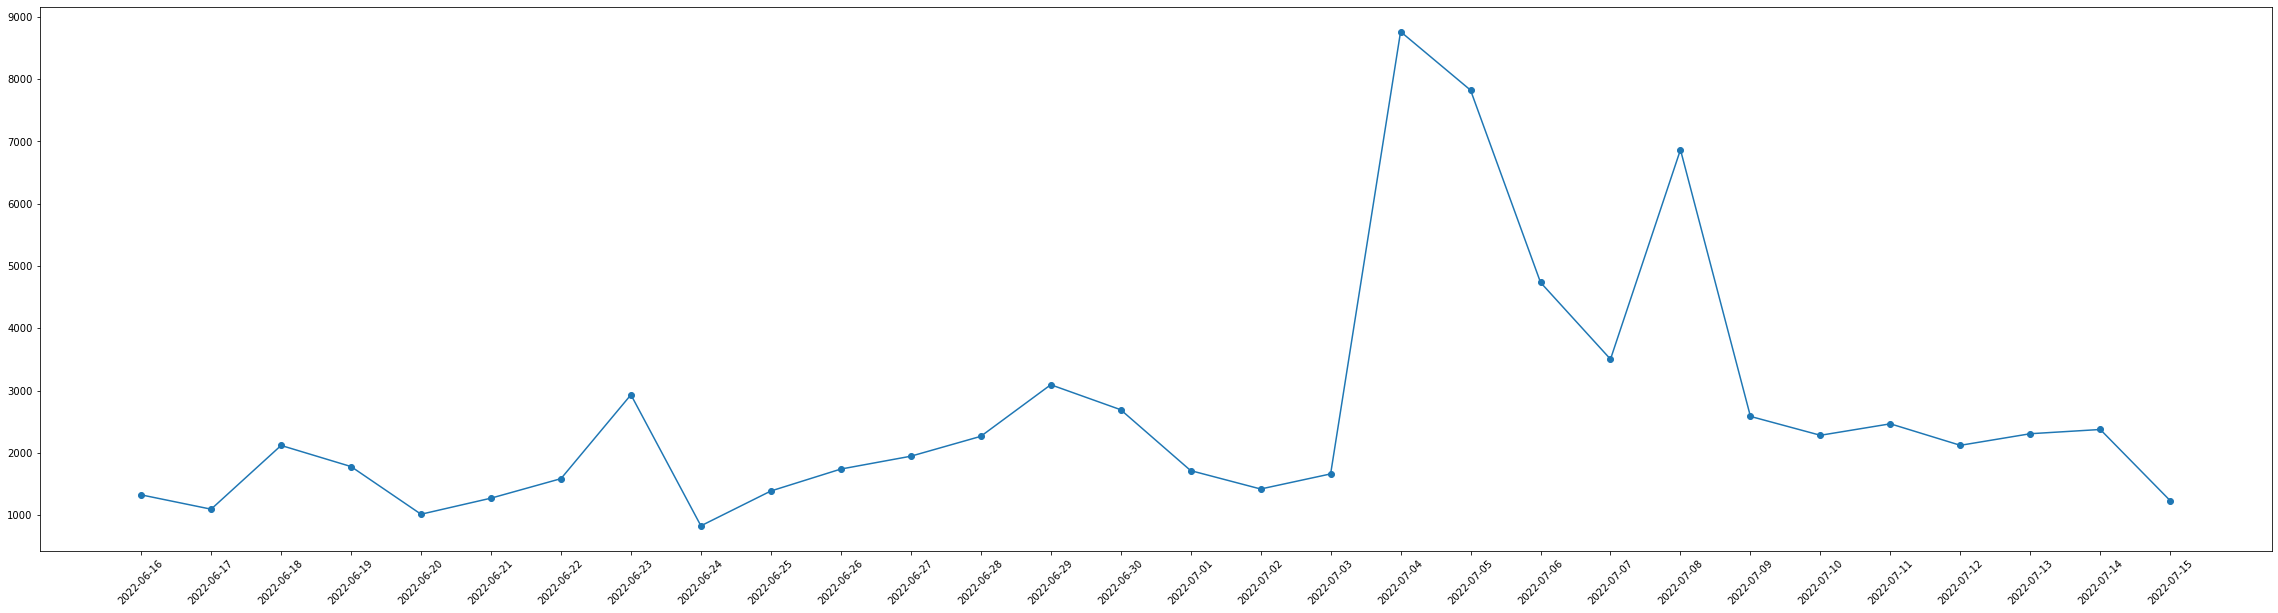

In [234]:
plt.figure(figsize=(40,10))
plt.plot(create_time[-30:], weibo_follower_diff[-30:], '-o')
plt.xticks(pd.date_range('2022-06-16', '2022-07-15'), rotation=45);

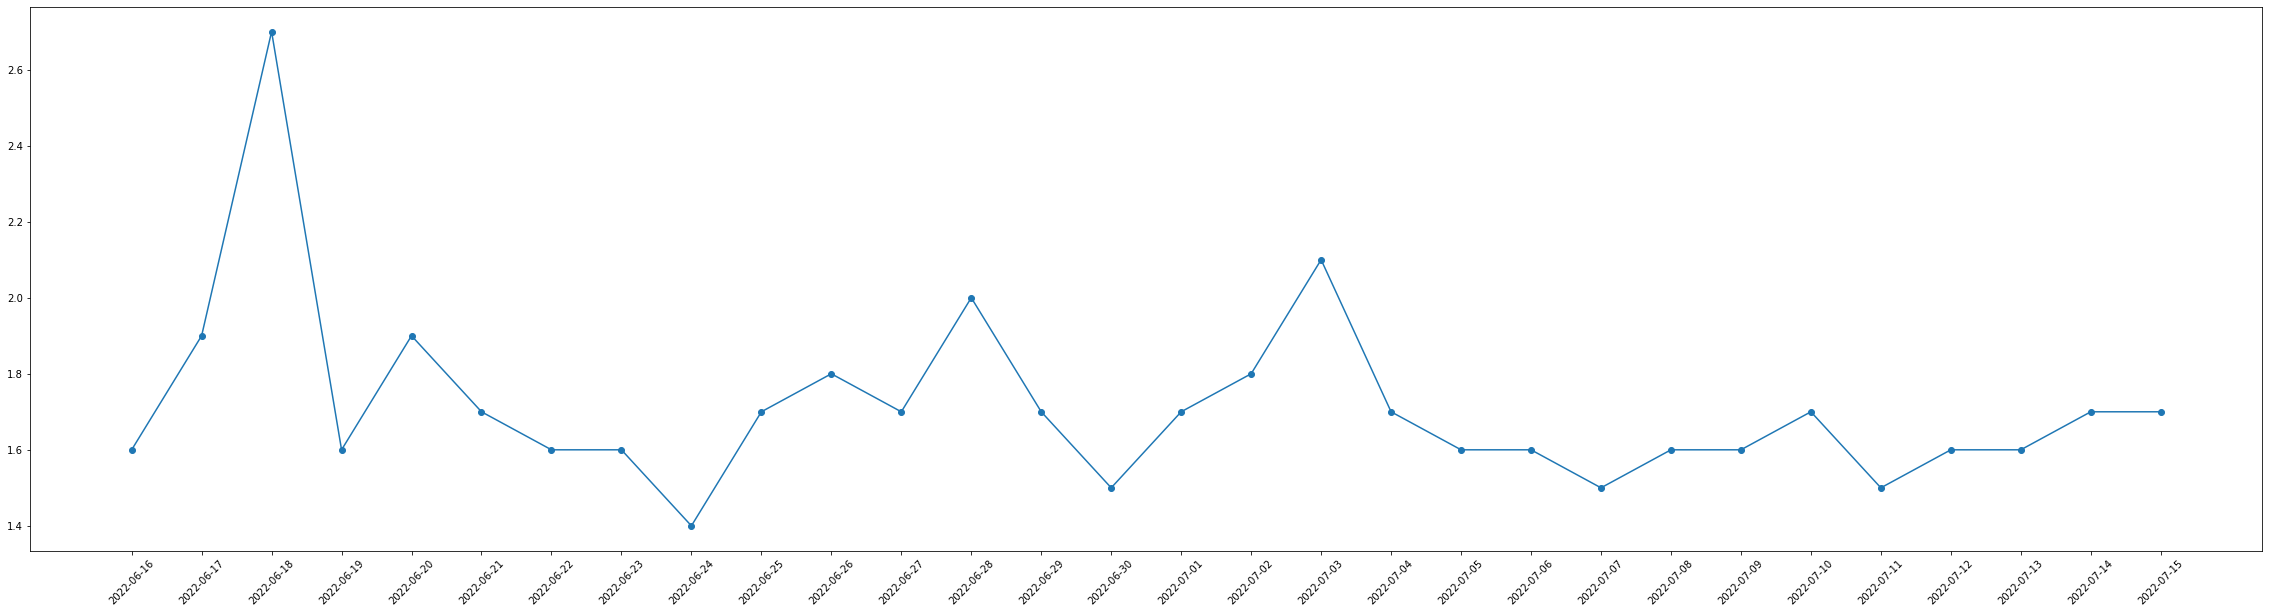

In [235]:
plt.figure(figsize=(40,10))
plt.plot(create_time[-30:], chaohua_read_yi_diff[-30:], '-o')
plt.xticks(pd.date_range('2022-06-16', '2022-07-15'), rotation=45);

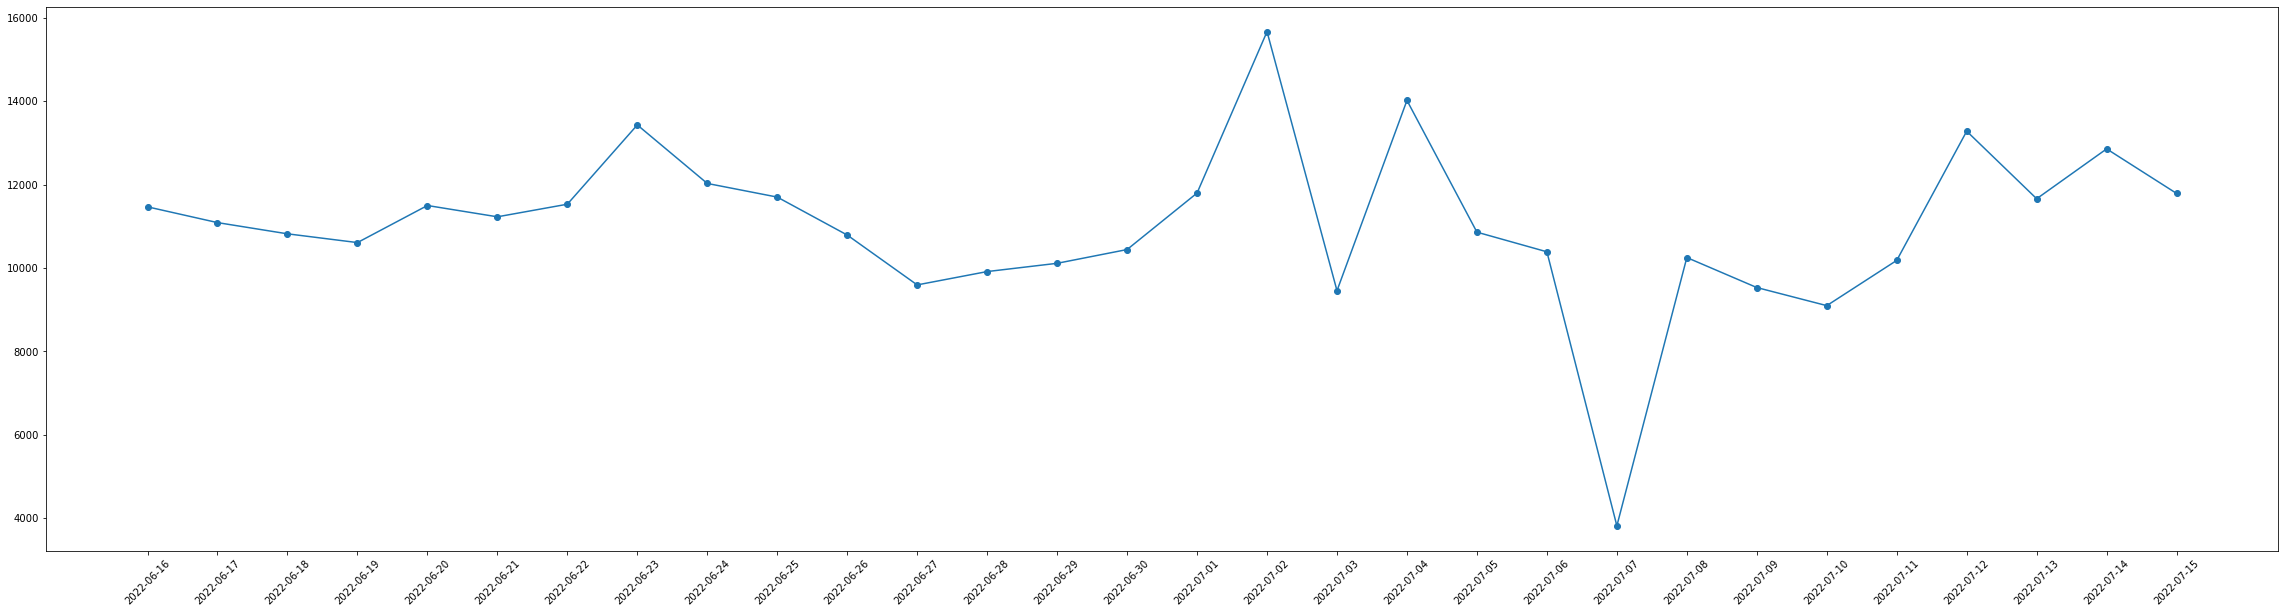

In [236]:
plt.figure(figsize=(40,10))
plt.plot(create_time[-30:], chaohua_count_diff[-30:], '-o')
plt.xticks(pd.date_range('2022-06-16', '2022-07-15'), rotation=45);

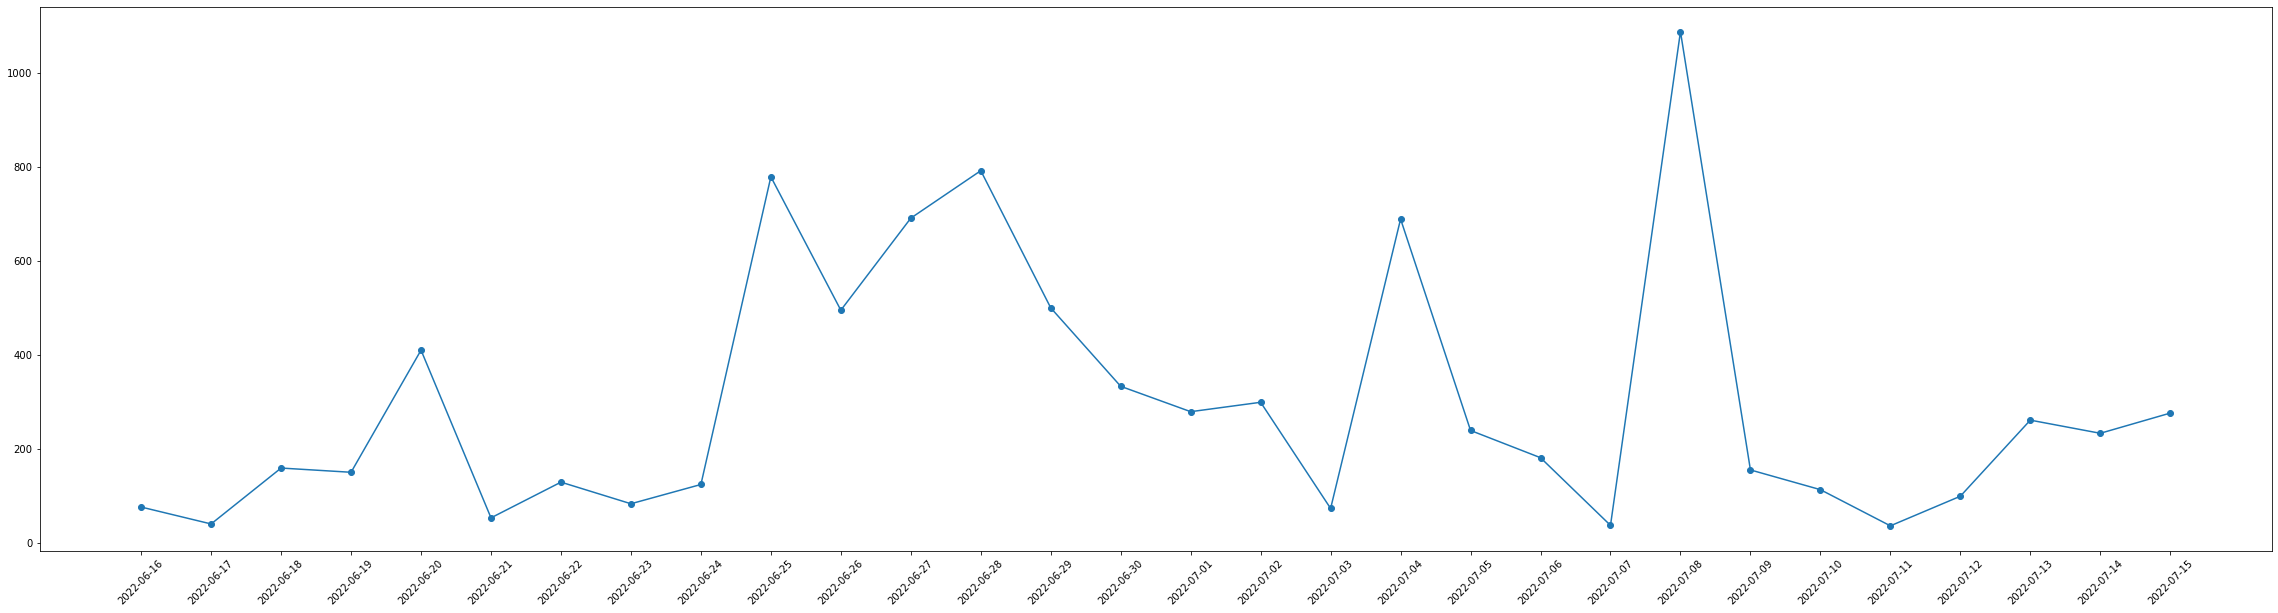

In [239]:
plt.figure(figsize=(40,10))
plt.plot(create_time[-30:], douyin_ch_user_count_diff[-30:], '-o')
plt.xticks(pd.date_range('2022-06-16', '2022-07-15'), rotation=45);

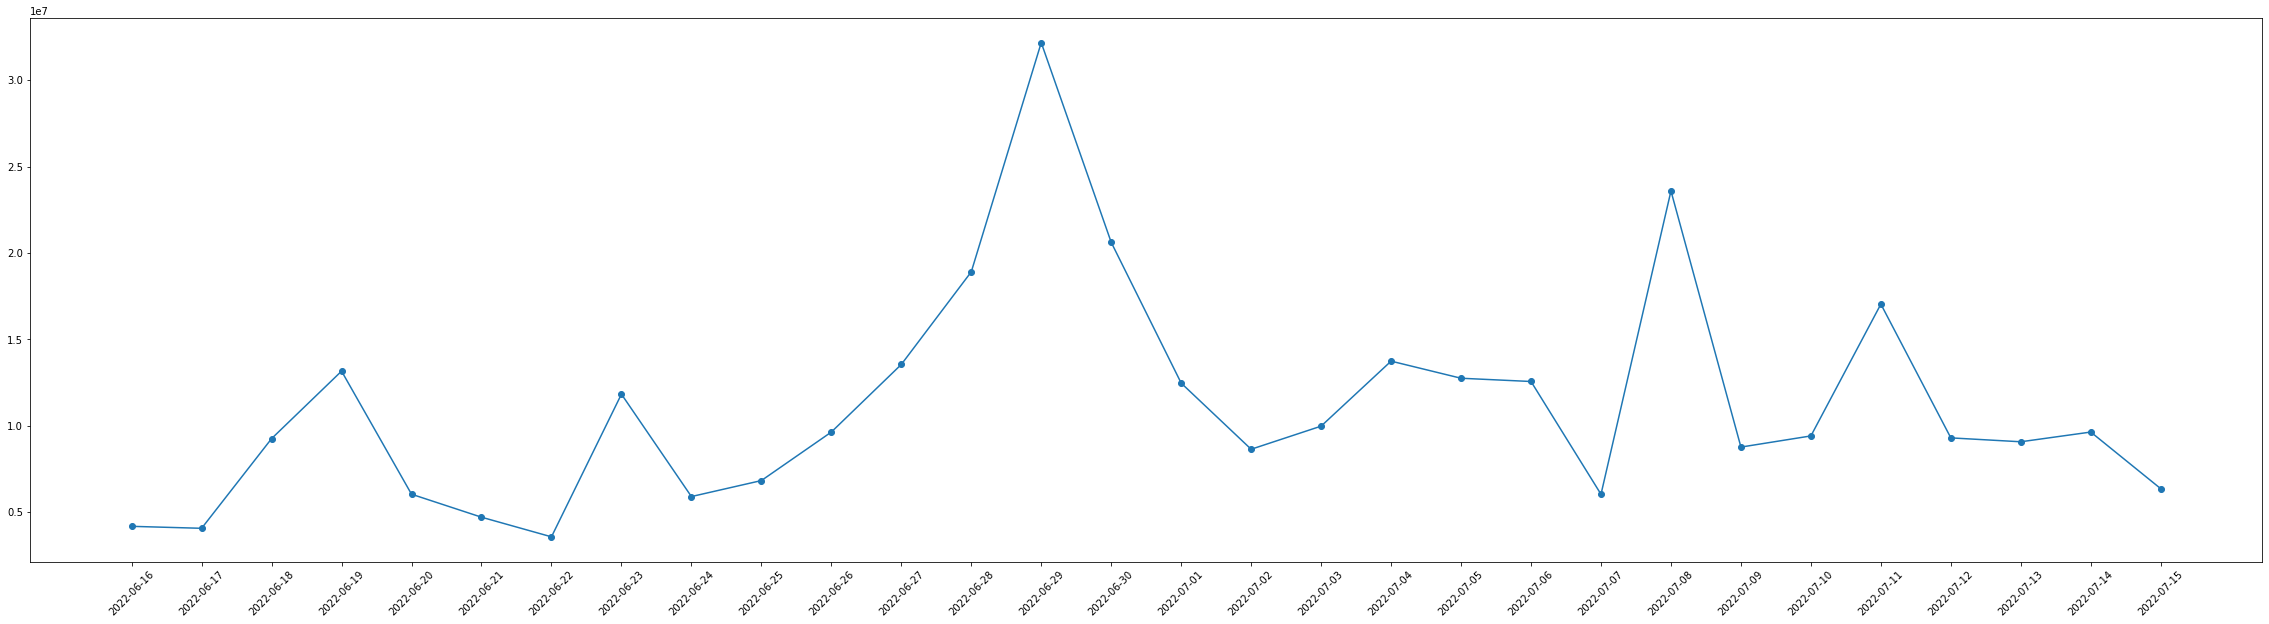

In [240]:
plt.figure(figsize=(40,10))
plt.plot(create_time[-30:], douyin_ch_view_count_diff[-30:], '-o')
plt.xticks(pd.date_range('2022-06-16', '2022-07-15'), rotation=45);